In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


In [2]:
marks = pd.read_csv('data/marks.csv', header= None)

In [3]:
marks.head()

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [4]:
marks[2]

0     0
1     0
2     0
3     1
4     1
5     0
6     1
7     1
8     1
9     1
10    0
11    0
12    1
13    1
14    0
15    1
16    1
17    0
18    1
19    1
20    0
21    1
22    0
23    0
24    1
25    1
26    1
27    0
28    0
29    0
     ..
70    0
71    1
72    1
73    1
74    1
75    1
76    1
77    1
78    0
79    0
80    1
81    1
82    1
83    1
84    1
85    1
86    0
87    1
88    1
89    0
90    1
91    1
92    0
93    1
94    1
95    1
96    1
97    1
98    1
99    1
Name: 2, Length: 100, dtype: int64

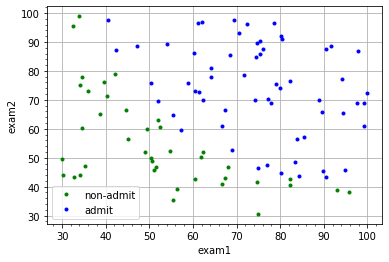

In [5]:
plt.plot(marks[(marks[2] == 0)][0], marks[(marks[2] == 0)][1],'g.',label='non-admit')
plt.plot(marks[(marks[2] == 1)][0], marks[(marks[2] == 1)][1],'b.',label='admit')
plt.xlabel('exam1')
plt.ylabel('exam2')
plt.legend()
plt.grid()
plt.minorticks_on()
plt.show()

In [6]:
X = marks.iloc[:, :-1]

# y = target values, last column of the data frame
Y = marks.iloc[:, -1]


X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

In [7]:
l_regress = LogisticRegression()

l_regress.fit(X_train,Y_train)

Y_pred = l_regress.predict(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [8]:
new_df = pd.DataFrame({'Actual_class': Y_test,'Predicted_class': Y_pred})
new_df.head()

,Actual_class,Predicted_class
26,1,1
86,0,1
2,0,0
55,0,0
75,1,1


In [9]:
accuracy = metrics.accuracy_score(Y_test,Y_pred)
parameters = l_regress.coef_
f1_score = metrics.f1_score(Y_test,Y_pred)
print(accuracy)
print(parameters)
print(f1_score)

0.95
[[0.03032132 0.03124498]]
0.9600000000000001


In [13]:
# from sklearn.compose import TransformedTargetRegressor

# ttr = TransformedTargetRegressor(l_regress, func=np.log, inverse_func=np.exp)

# ttr.fit(X_train, Y_train)
# ttr.predict(X_test)

AttributeError: 'LogisticRegression' object has no attribute 'p_value'

In [21]:
from sklearn import feature_selection
a = feature_selection.f_regression(X, Y, center=True)

TypeError: tuple indices must be integers or slices, not tuple